In [128]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
from skimage import io, color, img_as_bool, exposure, transform, feature
from skimage.feature import hog
%matplotlib inline

### Download images (.zip, Google Drive, ~1GB) [here](https://drive.google.com/file/d/1MEx7txB-U7gpM6P58cOMmanW-SsbDw5v/view?usp=sharing)

Save the zip where you want to store the images and unzip it

In [129]:
# file paths
ci_path = './plane_data/cropped_images/'
l_file = './plane_data/plane_labels.csv'

(360, 640, 4)


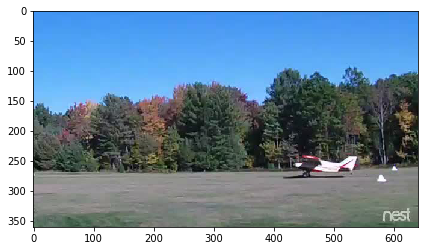

In [130]:
img_raw = io.imread('2016-10-10T19+44+49_610Z')
print(img_raw.shape)
io.imshow(img_raw)

## scikit image

#### helpful submodules and methods for image processing and feature extraction

* [io](http://scikit-image.org/docs/dev/api/skimage.io.html)  
* [color](http://scikit-image.org/docs/dev/api/skimage.color.html)  
* [exposure](http://scikit-image.org/docs/dev/api/skimage.exposure.html)   
* [transform](http://scikit-image.org/docs/dev/api/skimage.transform.html)   
* [feature](http://scikit-image.org/docs/dev/api/skimage.feature.html)  
* [img_as_bool](http://scikit-image.org/docs/dev/api/skimage.html#img-as-bool)   

#### other resources

* [RGBA](https://en.wikipedia.org/wiki/RGBA_color_space)  


In [131]:
# all labels
plane_data = pd.read_csv(l_file)
print(plane_data.head())
print(plane_data.shape)

                   img_name  plane
0  2016-08-02T13+50+24_430Z  False
1  2016-08-02T14+12+37_390Z  False
2  2016-08-02T22+20+26_600Z  False
3  2016-08-03T12+04+30_670Z  False
4  2016-08-03T12+32+21_790Z  False
(6758, 2)


### let's look at some images that contain an airplane

In [132]:
# filter to include only the airplane images
print(plane_data['plane'].sum())
aircraft = plane_data[plane_data['plane']==True]
print(aircraft.shape)

101
(101, 2)


In [133]:
# take a random subset of 20 of the airplane images
aircraft_subset = aircraft.sample(20)
print(aircraft_subset.shape)

(20, 2)


In [135]:
# in downscaling the image, what do you want the new dimensions to be?
# the original dimensions of cropped images: (60, 140), which if 8,400 pixels
# dims = (30, 70) # 25% of the original size, 525 pixels
# dims = (45, 105) # 75% of the original size
dims = (60, 140) # 100% of the original size

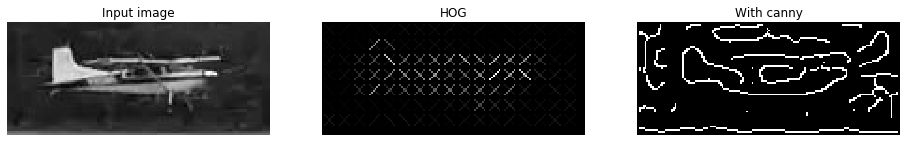

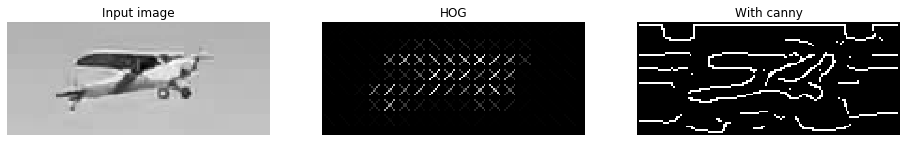

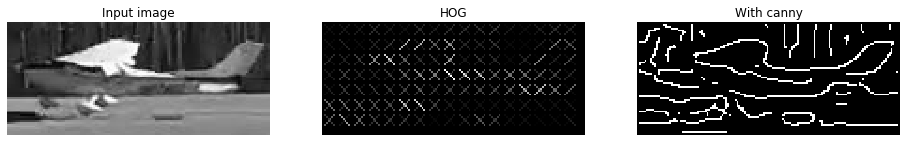

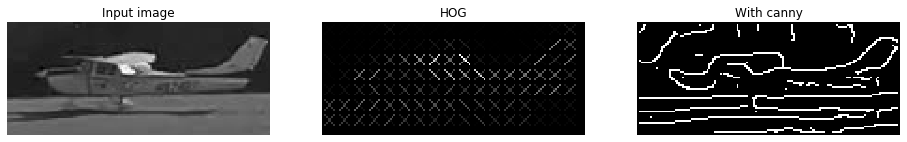

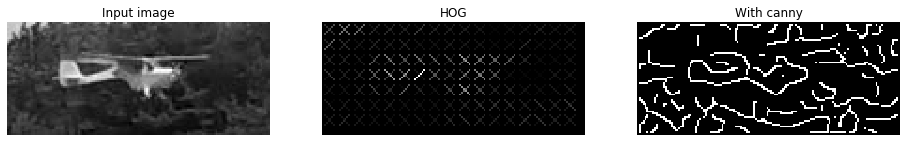

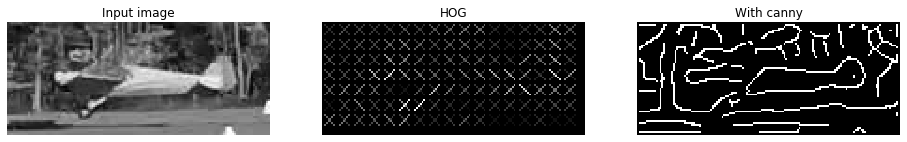

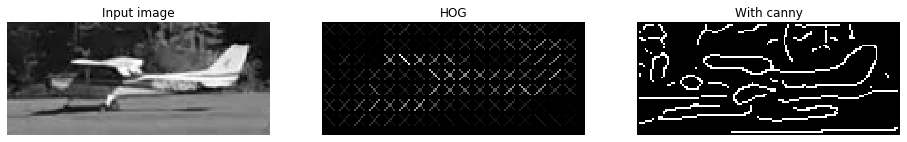

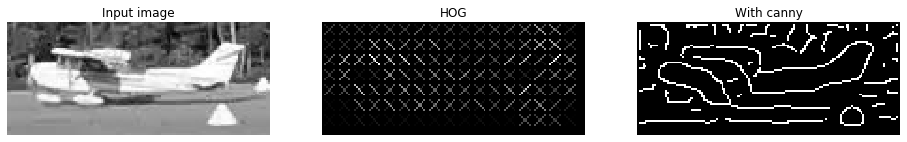

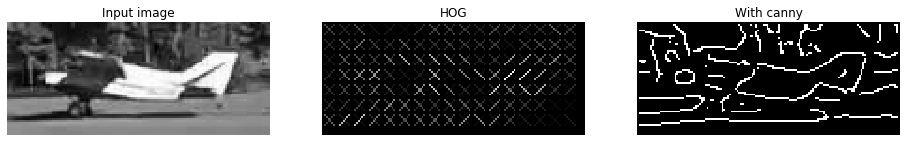

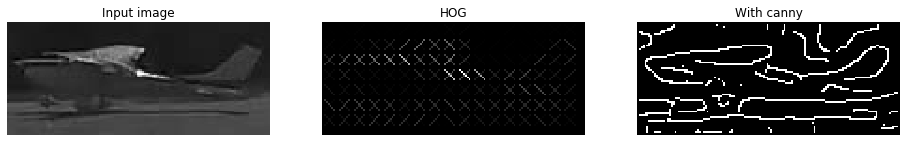

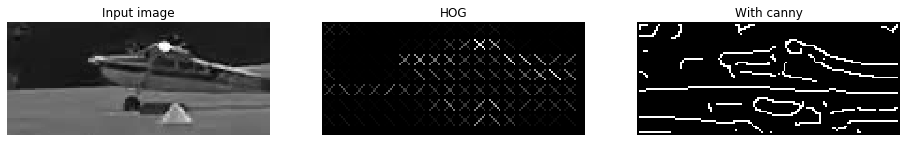

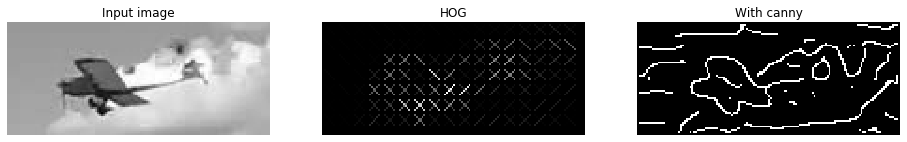

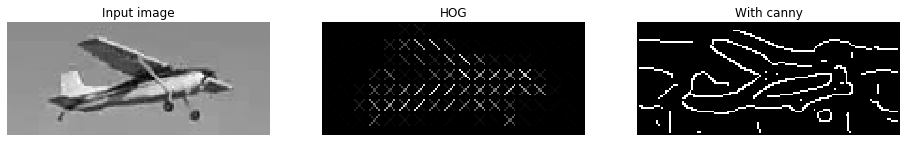

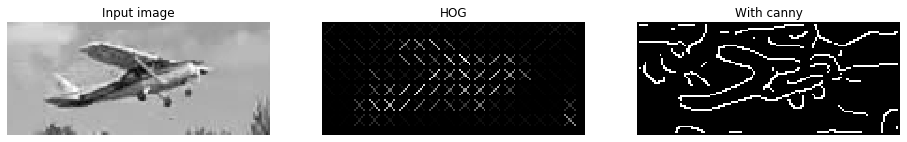

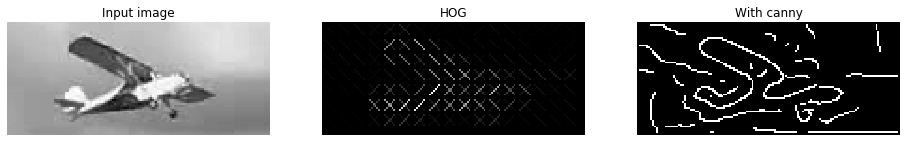

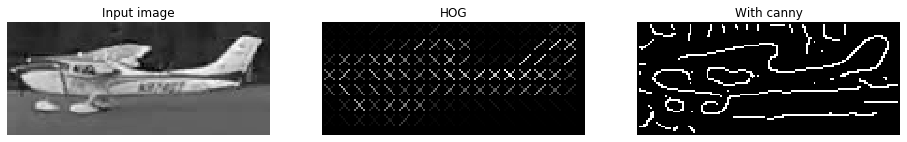

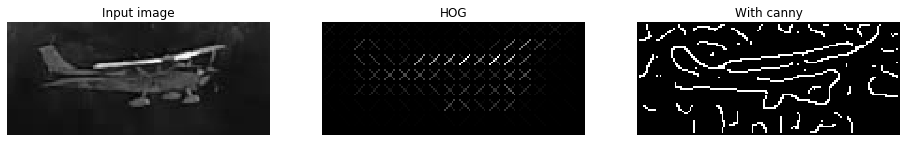

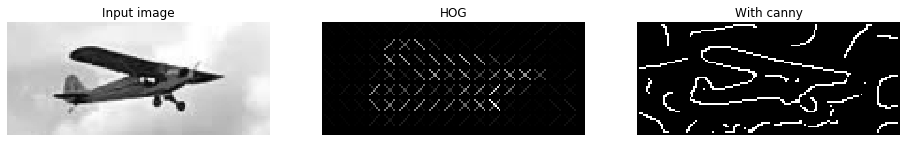

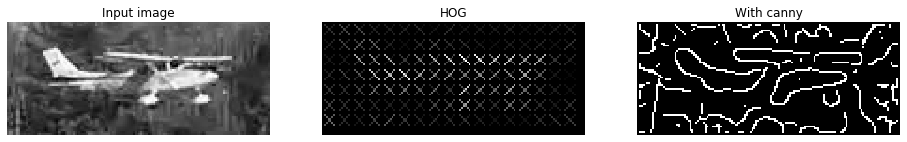

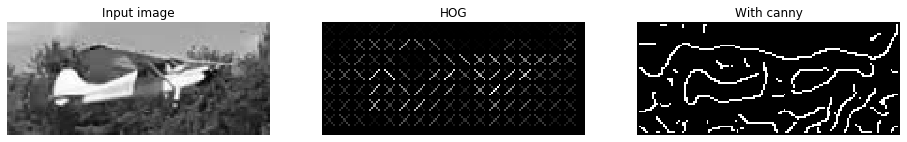

In [170]:
# let's look at some transformed images of positives (airplanes)
for index, row in aircraft_subset.iterrows():
    imname = ci_path + row['img_name'] + '.png'
#     img_raw = io.imread(imname,as_gray=True)
#     downscaled = transform.resize(img_raw, (dims[0], dims[1])) # downscale image
#     final_image=feature.canny(downscaled,sigma=1.0, low_threshold=None, high_threshold=None, use_quantiles=False)
#     greycm = feature.greycomatrix(downscaled)
#     final_image=feature.canny(downscaled,sigma=3,use_quantiles=False)
#     gray = color.rgb2gray(downscaled) # remove color
#     final_image = img_as_bool(gray) # convert grayscale to boolean
#     plt.figure()
#     io.imshow(final_image)
    
    img_raw = io.imread(imname,as_gray=True)
    downscaled = transform.resize(img_raw, (dims[0], dims[1])) # downscale image
#     canny_image=feature.canny(downscaled,sigma=2,use_quantiles=False)
    fd, hog_image = hog(downscaled, orientations=2, pixels_per_cell=(8, 8),
                    cells_per_block=(2, 2), visualize=True, multichannel=False)
    
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16, 8), sharex=True, sharey=True)
    ax1.axis('off')
    ax1.imshow(downscaled, cmap=plt.cm.gray)
    ax1.set_title('Input image')

# Rescale histogram for better display
    hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))
    ax2.axis('off')
    ax2.imshow(hog_image, cmap=plt.cm.gray)
    ax2.set_title('HOG')

# Add Canny
    final_image=feature.canny(downscaled,sigma=3,use_quantiles=True)
    ax3.axis('off')
    ax3.imshow(final_image, cmap=plt.cm.gray)
    ax3.set_title('With canny')
    plt.show()

### look at transformed images WITHOUT airplanes

(20, 2)


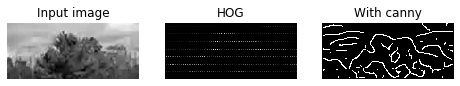

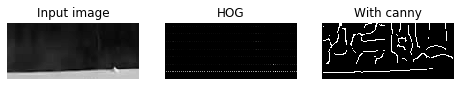

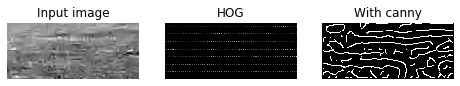

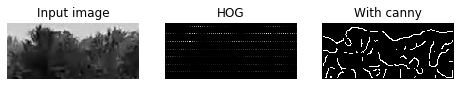

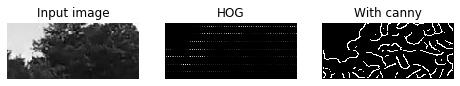

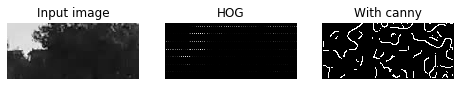

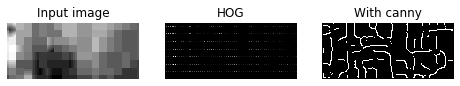

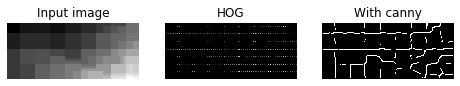

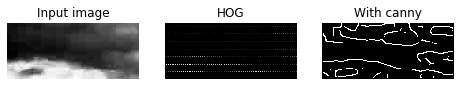

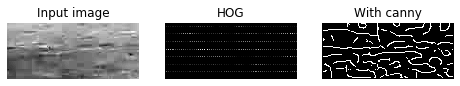

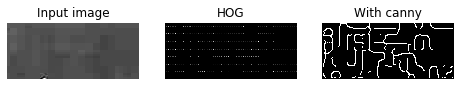

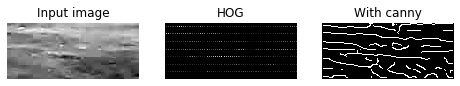

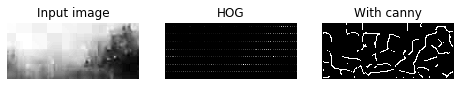

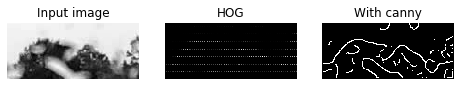

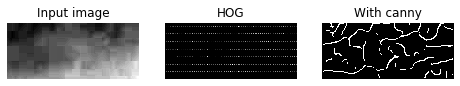

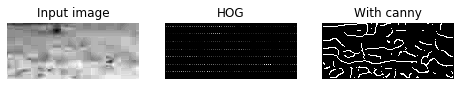

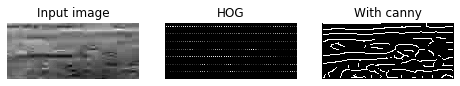

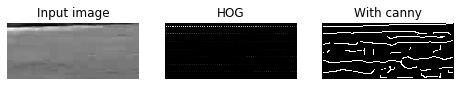

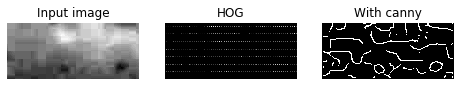

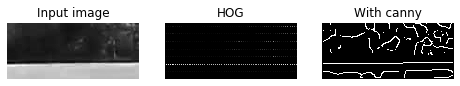

In [160]:
# filter to include only NON airplane images
nonaircraft = plane_data[plane_data['plane']==False]
# take a random subset of 20 of the NON airplane images
nonaircraft_subset = nonaircraft.sample(20)
print(nonaircraft_subset.shape)

# let's look at some transformed images of positives (airplanes)
for index, row in nonaircraft_subset.iterrows():
    imname = ci_path + row['img_name'] + '.png'
#     img_raw = io.imread(imname,as_gray=True)
#     downscaled = transform.resize(img_raw, (dims[0], dims[1])) # downscale image
#     gray = color.rgb2gray(img_raw) # remove color
#     final_image = img_as_bool(gray) # convert grayscale to boolean
#     final_image=feature.canny(downscaled,sigma=3,use_quantiles=False)
#     plt.figure()
#     io.imshow(final_image)


    img_raw = io.imread(imname,as_gray=True)
    downscaled = transform.resize(img_raw, (dims[0], dims[1])) # downscale image
#     canny_image=feature.canny(downscaled,sigma=2,use_quantiles=False)
    fd, hog_image = hog(downscaled, orientations=1, pixels_per_cell=(8, 2),
                    cells_per_block=(2, 2), visualize=True, multichannel=False)
    
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(8, 4), sharex=True, sharey=True)
    ax1.axis('off')
    ax1.imshow(downscaled, cmap=plt.cm.gray)
    ax1.set_title('Input image')

# Rescale histogram for better display
    hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))
    ax2.axis('off')
    ax2.imshow(hog_image, cmap=plt.cm.gray)
    ax2.set_title('HOG')

# Add Canny
    final_image=feature.canny(downscaled,sigma=3,use_quantiles=True)
    ax3.axis('off')
    ax3.imshow(final_image, cmap=plt.cm.gray)
    ax3.set_title('With canny')
    plt.show()